In [31]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
import pylab as plt
import numpy as np
from astropy.table import Table

In [32]:
# Retrieve from  http://portal.nersc.gov/project/cosmo/temp/dstn/sdss-gaia-synflux-gals.fits
S = Table.read('sdss-gaia-synflux-gals.fits')

In [20]:
for k,v in S.columns.items():
    setattr(S, k, v)

261661 objects


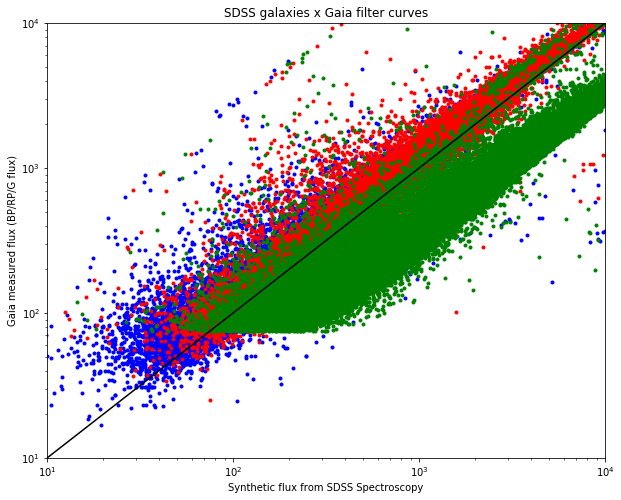

In [26]:
I = np.flatnonzero((S.synflux_g > 0.) * np.isfinite(S.phot_bp_mean_flux) * np.isfinite(S.phot_rp_mean_flux)
                  * (S.synflux_bp > 0) * (S.synflux_rp > 0)
                  * (S.gal)
                  * (S.wavemax>9000)
                  * (S.wavemin<3900))
print(len(I), 'objects')
plt.loglog(S.synflux_bp[I], S.phot_bp_mean_flux[I], 'b.')
plt.loglog(S.synflux_rp[I], S.phot_rp_mean_flux[I], 'r.')
plt.loglog(S.synflux_g[I], S.phot_g_mean_flux[I], 'g.')

lo,hi = 1e1, 1e4
plt.plot([lo,hi],[lo,hi], 'k-')
plt.axis([lo,hi,lo,hi])

plt.xlabel('Synthetic flux from SDSS Spectroscopy')
plt.ylabel('Gaia measured flux (BP/RP/G flux)');
plt.title('SDSS galaxies x Gaia filter curves');

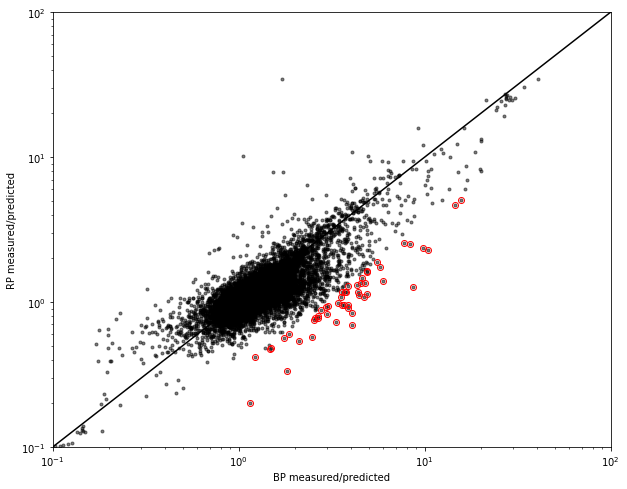

In [27]:
np.seterr(divide='ignore', invalid='ignore')
xx = S.phot_bp_mean_flux / S.synflux_bp
yy = S.phot_rp_mean_flux / S.synflux_rp
plt.loglog(xx[I], yy[I], 'k.', alpha=0.5)

# Absolutely bluest
#J = np.argsort(-xx[I])
# Relatively bluest
J = np.argsort(-xx[I] / yy[I])
# Relatively reddest
#J = np.argsort(-yy[I] / xx[I])
J = I[J]
plt.plot(xx[J[:50]], yy[J[:50]], 'o', mec='r', mfc='none')

lo,hi = 1e-1, 1e2
plt.plot([lo,hi],[lo,hi], 'k-')
plt.axis([lo,hi,lo,hi])

plt.xlabel('BP measured/predicted')
plt.ylabel('RP measured/predicted');

In [30]:
from IPython.core.display import HTML
html = '<table>'
for ii,j in enumerate(J[:200]):
    if S.dec[j] > 30.:
        blink='mzls+bass-dr6'
    else:
        blink='decals-dr5'
    blink = blink.replace('+', '%2B')
    html += '<tr><td>'
    html += '<a href="http://legacysurvey.org/viewer-dev/?layer=sdss2&ra=%.4f&dec=%.4f&zoom=16">' % (S.ra[j], S.dec[j])
    html += '<img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=sdss2&ra=%.4f&dec=%.4f&pixscale=0.262&size=100" width="100" height="100">' % (S.ra[j], S.dec[j])
    html += '</a></td><td>'
    html += '<img src="http://legacysurvey.org/viewer-dev/jpeg-cutout/?layer=%s&ra=%.4f&dec=%.4f&pixscale=0.262&size=100" width="100" height="100">' % (blink, S.ra[j], S.dec[j])
    html += '</td><td>#%i: %s</td></tr>' % (ii,S.source_id[j])
html += '</table>'
HTML(html)

,,#0: 851779838288128896
,,#1: 3695394637484693504
,,#2: 2500319132672196096
,,#3: 1877393942397959936
,,#4: 3889076329430243328
,,#5: 3889076329430243328
,,#6: 2651165805811367552
,,#7: 688547475900184832
,,#8: 3999647238808642944
,,#9: 1485584485667856256
,,#10: 664441817332387712
